In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import re
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
def convert1(s):
  l = []
  s = list(s)
  for i in s:
    if 'followers' in i:
      i = i.replace(" followers","")
    else:
      i = i  
    if 'k' not in i:
      u = i.replace("," , "")
      u = int(u)
    elif 'k' in i:
      u = float(i[0:len(i) - 1]) * 1000
    else:
      u = i  
    l.append(u)
  return l 



def data_pre(text):
  text = str(text).lower()
  text = re.sub(r"https\S+","",text,flags=re.MULTILINE)

  text = re.sub(r'\@w+|\#',"",text)

  text = re.sub(r'[^\w\s]' , "", text)

  text_tokens = word_tokenize(text)

  filtered_text = [w for w in text_tokens if not w in stop_words]

  f = " ".join(filtered_text)

  y = []

  for i in list(f.split(" ")):
    y.append(stemmer.stem(i))

  return " ".join(y)  

In [5]:
df = pd.read_csv('/content/DA-AI-ML-interview-assignment-Data (1).csv')

In [6]:
df['num_ratings'] = convert1(df['num_ratings'])
df['num_reviews'] = convert1(df['num_reviews'])
df['num_followers'] = convert1(df['num_followers'])

df['num_ratings'] = df['num_ratings'] / 1000

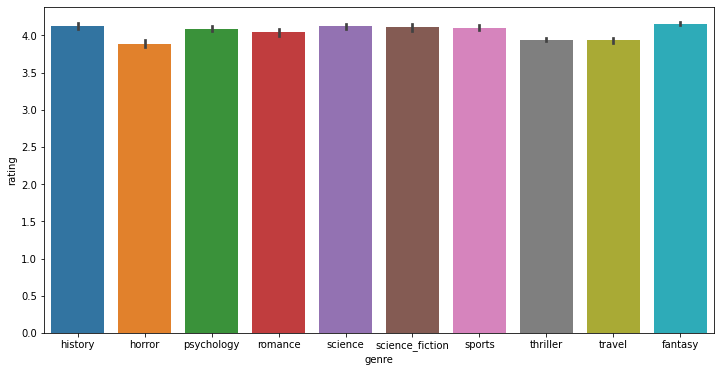

In [7]:
plt_1 = plt.figure(figsize=(12, 6))

sns.barplot(x = df['genre'] , y = df['rating'])
plt.show()

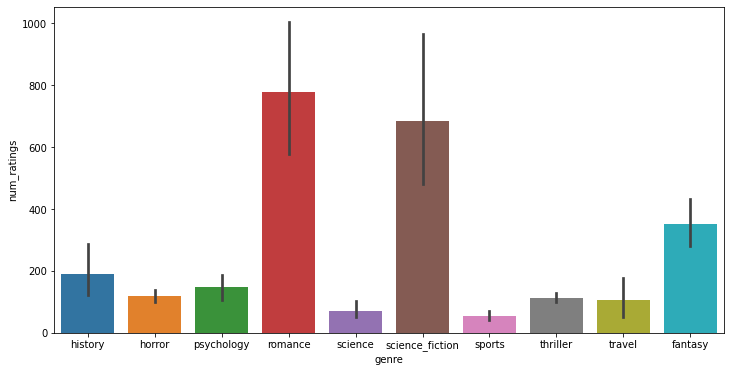

In [8]:
plt_1 = plt.figure(figsize=(12, 6))

sns.barplot(x = df['genre'] , y = df['num_ratings'])

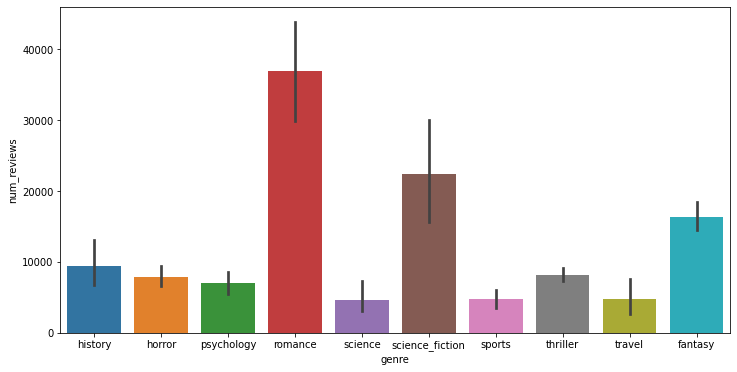

In [9]:
plt_1 = plt.figure(figsize=(12, 6))

sns.barplot(x = df['genre'] , y = df['num_reviews'])

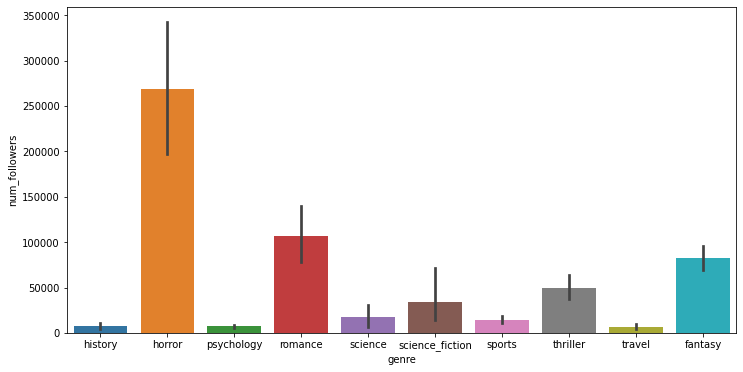

In [10]:
plt_1 = plt.figure(figsize=(12, 6))

sns.barplot(x = df['genre'] , y = df['num_followers'])

In [11]:
import warnings
warnings.filterwarnings('ignore')


dff = df[['title', 'name', 'num_ratings','num_followers', 'synopsis', 'genre']]
dff['tags'] = dff['title'] + " " + dff['name'] + " " + dff['synopsis']

df2 = dff[['num_ratings' , 'num_followers', 'tags' , 'genre']]

df2['tags'] = df2.tags.apply(data_pre)

maps = {'history':0, 'horror':1, 'psychology':2, 'romance':3, 'science':4,
       'science_fiction':5, 'sports':6, 'thriller':7, 'travel':8, 'fantasy':9}

df2['genre'] = df2['genre'].map(maps)       

In [12]:
X = df2

In [13]:
tf_vec = TfidfVectorizer(min_df = 5)
tf = tf_vec.fit_transform(X['tags'].values)

a1 = tf.toarray()
d1 = pd.DataFrame(a1)

In [14]:
k = pd.concat([d1,X.drop(['tags'] , axis = 1)] , axis = 1)

In [15]:
k

,0,1,2,3,4,5,6,7,8,9,...,3966,3967,3968,3969,3970,3971,3972,num_ratings,num_followers,genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,806.229,30500.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,367.056,6538.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,224.620,2354.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,613.157,64200.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3313.033,4621.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,83.827,11905.0,9
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,775.001,22897.0,9
1536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,310.138,30510.0,9
1537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,337.538,66448.0,9


In [16]:
z = k[k['genre'] == 7]
j = k

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

for i in range(0,10):

  if i != 7:

    p = pd.concat([j[j['genre'] == 7] , j[j['genre'] == i]] , axis = 0)

    X1 = p.drop(['genre'] , axis = 1)
    y1 = p['genre']
    X1 , y1 = smote.fit_resample(X1 , y1)

    o = pd.concat([X1 , y1] , axis = 1)
    o = o[o['genre'] == i]

    z =  pd.concat([o , z] , axis = 0)

In [18]:
A_train1, A_test1, b_train1, b_test1 = train_test_split(z.drop(['genre'] , axis = 1),z['genre'], test_size=0.20, random_state=42 ,shuffle = True)

In [19]:
def build2_model(model):
  model.fit(A_train1 , b_train1)
  b_pred1 = model.predict(A_test1)
  
  print(classification_report(b_test1, b_pred1))
  print()

  cm = confusion_matrix(b_test1 , b_pred1)
  cm_df = pd.DataFrame(data = cm, columns = np.arange(10) , index = np.arange(10))

  sns.heatmap(cm_df , annot = True , cbar = False , fmt='d')

  plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.92      0.98      0.95        92
           2       1.00      0.99      0.99        79
           3       0.98      0.96      0.97        83
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00       103
           6       1.00      0.98      0.99        97
           7       0.91      0.91      0.91       112
           8       0.98      0.99      0.98        98
           9       0.96      0.94      0.95       114

    accuracy                           0.97       962
   macro avg       0.97      0.97      0.97       962
weighted avg       0.97      0.97      0.97       962




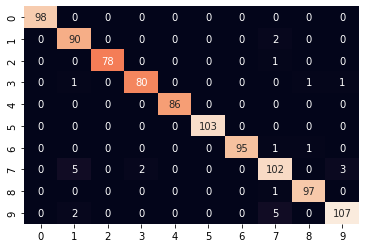

In [74]:
import warnings
warnings.filterwarnings('ignore')


model2 = RandomForestClassifier(class_weight = 'balanced')
build2_model(model2)


In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_lg

In [27]:
R

,num_ratings,num_followers,genre,0,1,2,3,4,5,6,...,290,291,292,293,294,295,296,297,298,299
0,806.229,30500.0,0,-0.409920,0.159760,-1.528096,-0.586289,1.047326,0.587542,1.008818,...,1.427515,-0.932434,-0.390372,-0.850267,-0.033215,-0.503522,0.504131,-0.020453,-1.847532,0.694843
1,367.056,6538.0,0,-0.390582,-0.267409,-0.738756,-0.543860,1.949913,0.131504,0.914915,...,1.459256,-0.603876,0.153285,0.011425,-0.958693,-0.333160,0.636472,-1.011338,-1.459173,0.698550
2,224.620,2354.0,0,-0.656235,0.693299,-1.116402,0.188011,2.102207,0.552836,0.778393,...,0.485169,-0.328163,0.020396,-0.283038,-0.693091,0.543795,0.006498,-1.098481,-1.724967,0.751055
3,613.157,64200.0,0,-1.014607,0.173381,-1.063239,-0.743084,1.151055,0.152210,1.068548,...,0.760853,-0.526790,0.676904,0.198933,-1.154588,-0.201563,0.756608,0.067416,-1.682554,0.746659
4,3313.033,4621.0,0,-0.473540,0.224192,-1.293904,-0.654893,1.423605,0.288577,1.720631,...,1.511957,-0.468626,-0.161087,-0.447313,-0.409637,-0.389678,0.551970,0.271156,-1.889230,0.271270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,83.827,11905.0,9,-0.328997,0.740921,-0.823344,-0.390233,0.444715,0.633112,0.562548,...,0.878354,-0.449170,0.468799,-0.437383,-0.523878,0.317808,0.069541,0.467803,-2.107172,0.183227
1535,775.001,22897.0,9,-0.217161,0.529808,-1.356024,0.042724,0.476237,0.591021,0.516905,...,0.609948,-0.434260,0.257656,0.063396,-1.233435,0.227214,0.158520,0.745287,-1.235963,-0.401985
1536,310.138,30510.0,9,-0.897701,0.639048,-1.658144,-0.466075,1.216423,0.415931,1.240685,...,1.276569,-0.166725,-0.072541,-0.847106,-0.474877,-0.231624,-0.200912,0.593385,-1.994344,0.296224
1537,337.538,66448.0,9,-0.272245,0.390302,-1.842149,-0.200995,0.997272,0.077679,0.693446,...,0.842511,0.028112,-0.096223,-0.820386,-1.014927,0.353315,0.358884,1.056699,-1.472319,0.202805


In [22]:
import spacy
nlp = spacy.load("en_core_web_lg")

X['vector'] = X['tags'].apply(lambda tags: nlp(tags).vector)

xm = np.stack(X['vector'])



In [ ]:
P = pd.DataFrame(xm)
R = pd.concat([X.drop(['tags' , 'vector'] , axis = 1) , P] , axis = 1) 



In [28]:
z = R[R['genre'] == 7]
j = R

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

for i in range(0,10):

  if i != 7:

    p = pd.concat([j[j['genre'] == 7] , j[j['genre'] == i]] , axis = 0)

    X1 = p.drop(['genre'] , axis = 1)
    y1 = p['genre']
    X1 , y1 = smote.fit_resample(X1 , y1)

    o = pd.concat([X1 , y1] , axis = 1)
    o = o[o['genre'] == i]

    z =  pd.concat([o , z] , axis = 0)

In [31]:
z['genre'].value_counts()

9    481
8    481
6    481
5    481
4    481
3    481
2    481
1    481
0    481
7    481
Name: genre, dtype: int64

In [32]:
A_train2, A_test2, b_train2, b_test2 = train_test_split(z.drop(['genre'] , axis = 1),z['genre'], test_size=0.20, random_state=42 ,shuffle = True)

In [39]:

def build3_model(model):
  model.fit(A_train2 , b_train2)
  b_pred2 = model.predict(A_test2)
  
  print(classification_report(b_test2, b_pred2))
  print()

  cm = confusion_matrix(b_test2 , b_pred2)
  cm_df = pd.DataFrame(data = cm, columns = np.arange(10) , index = np.arange(10))

  sns.heatmap(cm_df , annot = True , cbar = False , fmt='d')

  plt.show()

  

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        98
           1       0.87      0.95      0.91        92
           2       0.99      0.99      0.99        79
           3       0.85      0.92      0.88        83
           4       0.98      0.98      0.98        86
           5       0.97      1.00      0.99       103
           6       0.97      1.00      0.98        97
           7       0.88      0.69      0.77       112
           8       0.98      0.96      0.97        98
           9       0.89      0.84      0.86       114

    accuracy                           0.92       962
   macro avg       0.92      0.93      0.93       962
weighted avg       0.92      0.92      0.92       962




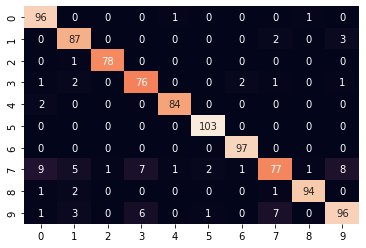

In [34]:
import warnings
warnings.filterwarnings('ignore')

model2 = RandomForestClassifier(class_weight = 'balanced')
build3_model(model2)



**Sample testing**

In [45]:
M = pd.read_csv('/content/DA-AI-ML-interview-assignment-Data (1).csv')

In [47]:
M = M.sample(10)

In [50]:
M = M.drop(['genre'] , axis = 1)


M['num_ratings'] = convert1(M['num_ratings'])
M['num_reviews'] = convert1(M['num_reviews'])
M['num_followers'] = convert1(M['num_followers'])

M['num_ratings'] = M['num_ratings'] / 1000




Mf = M[['title', 'name', 'num_ratings','num_followers', 'synopsis']]
Mf['tags'] = Mf['title'] + " " + Mf['name'] + " " + Mf['synopsis']

M2 = Mf[['num_ratings' , 'num_followers', 'tags']]

M2['tags'] = df2.tags.apply(data_pre)



In [65]:
M2 = M2.reset_index()

In [66]:
M2 = M2.drop(['index'] , axis = 1)

In [68]:
#tf_vec = TfidfVectorizer(min_df = 5)
tf = tf_vec.transform(M2['tags'].values)

a1 = tf.toarray()
d1 = pd.DataFrame(a1)


k = pd.concat([d1,M2.drop(['tags'] , axis = 1)] , axis = 1)



In [ ]:
modelk = RandomForestClassifier(class_weight = 'balanced')
modelk.fit(A_train1 , b_train1)
o  = modelk.predict(k)



In [80]:
keys = list(maps.keys())
values = list(maps.values())

for i in o:
  print("Genre of the book :"  ,keys[values.index(i)])

Genre of the book : fantasy
Genre of the book : sports
Genre of the book : thriller
Genre of the book : fantasy
Genre of the book : romance
Genre of the book : fantasy
Genre of the book : psychology
Genre of the book : history
Genre of the book : thriller
Genre of the book : thriller
